## 1.
MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.   
Hint
- KNeighborsClassifier가 이 작업에 아주 잘 맞습니다.   
- 좋은 하이퍼파라미터 값 찾기: Grid Search CV(weights와 n_neighbors)

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [6]:
X_train.shape

(56000, 784)

In [7]:
y_train.shape

(56000,)

In [8]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
param_grid = {'weights': ['distance', 'uniform'],'n_neighbors':[3,4,5,6]}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 3)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['distance', 'uniform']})

In [10]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [11]:
grid_search.best_score_

0.943200078856116

In [12]:
grid_search.best_estimator_.fit(X_train, y_train)
accuracy = grid_search.score(X_test, y_test)
accuracy

0.9728571428571429

## 2.
MNIST 이미지를  (왼, 오른, 위, 아래 ) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어보세요.19 그런 다음 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본 (방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요. 마지막으로 이 확장된 데이터셋에서 앞에서 찾은 최선의 모델을 훈련시키고 테스트 세트에서 정확도를 측정해보세요. 모델 성능이 더 높아졌는지 확인해보세요! 인위적으로 훈련 세트를 늘리는 이 기법을 데이터 증식data augmentation 또는 훈련 세트 확장 training set expansion이라고 합니다.


In [13]:
from scipy.ndimage import shift

In [14]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

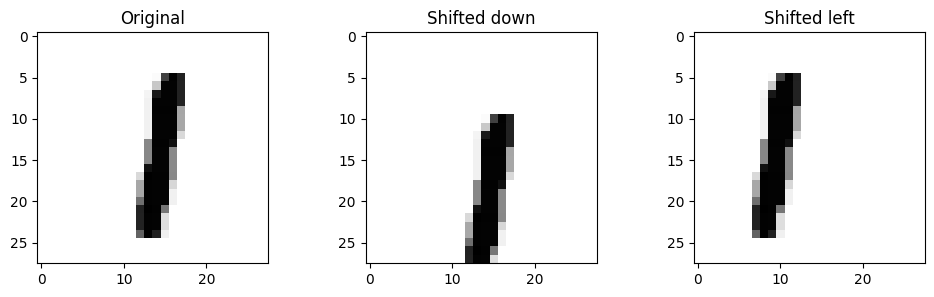

In [15]:
# 임의의 숫자 출력
image = X_train[500]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

- 증식된 훈련 세트 생성하기 : 왼/오/위/아래 1픽셀씩 이동

In [16]:
X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

- 데이터 랜덤으로 섞어주기

In [18]:
shuffle_idx = np.random.permutation(len(X_train_aug))

In [20]:
X_train_aug = X_train_aug[shuffle_idx]
y_train_aug = y_train_aug[shuffle_idx]

In [21]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [23]:
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [24]:
aug_accuracy = knn_clf.score(X_test, y_test)
aug_accuracy

0.9798571428571429